In [13]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

from mesh import *
from new_mol import *

import json
import time
import networkx as nx


In [22]:
filename = "dataset/{}.wrl".format(2)

In [23]:
m = gen_mol(filename)
base_fn = filename.split(".")[0]
enc_prop = []
with open("".join((base_fn, ".scprop")), "r") as f:
    for line in f:
        line = line.strip(" \n")
        if not line:
            continue
        enc_prop.append(float(line))
    
enc_prop = np.asarray(enc_prop)

#prj_prop = []
#with open("".join((base_fn, ".proj")), "r") as f:
#    for line in f:
#        line = line.strip(" \n")
#        if not line:
#            continue
#        prj_prop.append(float(line))
    
#prj_prop = np.asarray(prj_prop)

In [4]:
def eltime(func):
    def wrapper(*args, **kwargs):
        t1 = time.time()
        func(*args, **kwargs)
        t2 = time.time()
        print("Elapsed time: {}".format(t2-t1))

In [5]:
def getLocExtremums(mesh, function, dist):
    mins = []
    maxs = []

    for v in range(0, len(mesh.vertices)):
        neighbors = filter(lambda u: mesh.dist[u][v] <= dist, mesh.G.nodes())
        neighbors.remove(v)
        
        n_vals = np.asarray([function[u] for u in neighbors])
        n_min = np.min(n_vals)
        n_max = np.max(n_vals)

        if function[v] < n_min:
            mins.append(v)
        
        if function[v] > n_max:
            maxs.append(v)

    return mins, maxs

def findFragments(mesh, function, dist, sigmas):
    function = np.asarray(function)
    if len(function.shape) > 1:
        prop_len = function.shape[1]
    else:
        prop_len = 1

    blurred_func = FilterMesh(mesh, 
                              GaussianKernelWeightedDist, 
                              function, 
                              sigma=dist, 
                              prop_len=prop_len)
    
    blurred_func = np.asarray(blurred_func)
    fragments = dict()

    for sigma in sigmas:
        print("sigma: {}".format(sigma))
        log_func = FilterMesh(mesh,
                              LoGKernelWeightedDist,
                              blurred_func,
                              sigma=sigma,
                              prop_len=prop_len)
        
        mins, maxs = getLocExtremums(mesh, log_func, sigma)
        fragments[sigma] = [mins, maxs]
    
    return fragments

In [6]:
t1 = time.time()
geodesic_distances = {key : value for (key, value) in nx.all_pairs_dijkstra_path_length(m.mesh.G)}
t2 = time.time()
print("Elapsed time: {}".format(t2-t1))

Elapsed time: 52.602442026138306


In [7]:
weights = []

for e in m.mesh.G.edges():
    w = m.mesh.G[e[0]][e[1]]['weight']
    weights.append(w)

print(np.mean(weights), np.max(weights), np.min(weights))
    

0.2478266980418892 0.43679804945191786 0.0001295414991422897


In [8]:
getLocExtremums(m.mesh, enc_prop, 3.0)

([1209, 1290, 1590], [5, 265, 2242, 2421])

In [10]:
t1 = time.time()
frag = findFragments(m.mesh, enc_prop, dist=0.25, sigmas=[0.5, 0.75, 1.33])
t2 = time.time()
print("Elapsed time: {}".format(t2-t1))

0 3038
vvd: 28
1 3038
vvd: 28
2 3038
vvd: 28
3 3038
vvd: 28
4 3038
vvd: 25
5 3038
vvd: 29
6 3038
vvd: 30
7 3038
vvd: 31
8 3038
vvd: 32
9 3038
vvd: 29
10 3038
vvd: 30
11 3038
vvd: 31
12 3038
vvd: 32
13 3038
vvd: 31
14 3038
vvd: 31
15 3038
vvd: 31
16 3038
vvd: 34
17 3038
vvd: 32
18 3038
vvd: 33
19 3038
vvd: 36
20 3038
vvd: 33
21 3038
vvd: 26
22 3038
vvd: 32
23 3038
vvd: 31
24 3038
vvd: 26
25 3038
vvd: 29
26 3038
vvd: 24
27 3038
vvd: 24
28 3038
vvd: 28
29 3038
vvd: 30
30 3038
vvd: 26
31 3038
vvd: 27
32 3038
vvd: 25
33 3038
vvd: 34
34 3038
vvd: 34
35 3038
vvd: 34
36 3038
vvd: 26
37 3038
vvd: 31
38 3038
vvd: 26
39 3038
vvd: 22
40 3038
vvd: 22
41 3038
vvd: 25
42 3038
vvd: 27
43 3038
vvd: 25
44 3038
vvd: 20
45 3038
vvd: 24
46 3038
vvd: 25
47 3038
vvd: 36
48 3038
vvd: 35
49 3038
vvd: 34
50 3038
vvd: 28
51 3038
vvd: 28
52 3038
vvd: 23
53 3038
vvd: 22
54 3038
vvd: 23
55 3038
vvd: 24
56 3038
vvd: 25
57 3038
vvd: 23
58 3038
vvd: 22
59 3038
vvd: 19
60 3038
vvd: 25
61 3038
vvd: 32
62 3038
vvd: 32
63

493 3038
vvd: 25
494 3038
vvd: 24
495 3038
vvd: 22
496 3038
vvd: 28
497 3038
vvd: 32
498 3038
vvd: 34
499 3038
vvd: 35
500 3038
vvd: 35
501 3038
vvd: 35
502 3038
vvd: 37
503 3038
vvd: 37
504 3038
vvd: 37
505 3038
vvd: 35
506 3038
vvd: 36
507 3038
vvd: 31
508 3038
vvd: 32
509 3038
vvd: 26
510 3038
vvd: 27
511 3038
vvd: 29
512 3038
vvd: 31
513 3038
vvd: 32
514 3038
vvd: 25
515 3038
vvd: 24
516 3038
vvd: 26
517 3038
vvd: 33
518 3038
vvd: 31
519 3038
vvd: 28
520 3038
vvd: 34
521 3038
vvd: 33
522 3038
vvd: 33
523 3038
vvd: 37
524 3038
vvd: 35
525 3038
vvd: 36
526 3038
vvd: 34
527 3038
vvd: 35
528 3038
vvd: 30
529 3038
vvd: 26
530 3038
vvd: 28
531 3038
vvd: 28
532 3038
vvd: 28
533 3038
vvd: 32
534 3038
vvd: 28
535 3038
vvd: 32
536 3038
vvd: 35
537 3038
vvd: 30
538 3038
vvd: 34
539 3038
vvd: 32
540 3038
vvd: 35
541 3038
vvd: 32
542 3038
vvd: 26
543 3038
vvd: 29
544 3038
vvd: 22
545 3038
vvd: 26
546 3038
vvd: 25
547 3038
vvd: 32
548 3038
vvd: 35
549 3038
vvd: 33
550 3038
vvd: 35
551 3038
vvd: 

vvd: 35
995 3038
vvd: 35
996 3038
vvd: 36
997 3038
vvd: 34
998 3038
vvd: 39
999 3038
vvd: 34
1000 3038
vvd: 35
1001 3038
vvd: 36
1002 3038
vvd: 40
1003 3038
vvd: 40
1004 3038
vvd: 40
1005 3038
vvd: 40
1006 3038
vvd: 40
1007 3038
vvd: 39
1008 3038
vvd: 40
1009 3038
vvd: 37
1010 3038
vvd: 36
1011 3038
vvd: 36
1012 3038
vvd: 38
1013 3038
vvd: 36
1014 3038
vvd: 37
1015 3038
vvd: 38
1016 3038
vvd: 37
1017 3038
vvd: 36
1018 3038
vvd: 33
1019 3038
vvd: 36
1020 3038
vvd: 34
1021 3038
vvd: 35
1022 3038
vvd: 35
1023 3038
vvd: 35
1024 3038
vvd: 41
1025 3038
vvd: 37
1026 3038
vvd: 36
1027 3038
vvd: 36
1028 3038
vvd: 35
1029 3038
vvd: 38
1030 3038
vvd: 36
1031 3038
vvd: 38
1032 3038
vvd: 35
1033 3038
vvd: 34
1034 3038
vvd: 36
1035 3038
vvd: 42
1036 3038
vvd: 40
1037 3038
vvd: 38
1038 3038
vvd: 41
1039 3038
vvd: 38
1040 3038
vvd: 32
1041 3038
vvd: 37
1042 3038
vvd: 40
1043 3038
vvd: 38
1044 3038
vvd: 36
1045 3038
vvd: 29
1046 3038
vvd: 32
1047 3038
vvd: 40
1048 3038
vvd: 34
1049 3038
vvd: 36
1050 30

1456 3038
vvd: 31
1457 3038
vvd: 32
1458 3038
vvd: 38
1459 3038
vvd: 33
1460 3038
vvd: 33
1461 3038
vvd: 36
1462 3038
vvd: 37
1463 3038
vvd: 35
1464 3038
vvd: 38
1465 3038
vvd: 38
1466 3038
vvd: 36
1467 3038
vvd: 31
1468 3038
vvd: 38
1469 3038
vvd: 37
1470 3038
vvd: 37
1471 3038
vvd: 37
1472 3038
vvd: 35
1473 3038
vvd: 30
1474 3038
vvd: 28
1475 3038
vvd: 28
1476 3038
vvd: 30
1477 3038
vvd: 37
1478 3038
vvd: 36
1479 3038
vvd: 34
1480 3038
vvd: 36
1481 3038
vvd: 36
1482 3038
vvd: 38
1483 3038
vvd: 31
1484 3038
vvd: 39
1485 3038
vvd: 32
1486 3038
vvd: 29
1487 3038
vvd: 34
1488 3038
vvd: 33
1489 3038
vvd: 34
1490 3038
vvd: 32
1491 3038
vvd: 30
1492 3038
vvd: 30
1493 3038
vvd: 32
1494 3038
vvd: 33
1495 3038
vvd: 37
1496 3038
vvd: 33
1497 3038
vvd: 33
1498 3038
vvd: 38
1499 3038
vvd: 31
1500 3038
vvd: 36
1501 3038
vvd: 32
1502 3038
vvd: 33
1503 3038
vvd: 33
1504 3038
vvd: 35
1505 3038
vvd: 33
1506 3038
vvd: 34
1507 3038
vvd: 34
1508 3038
vvd: 37
1509 3038
vvd: 28
1510 3038
vvd: 36
1511 3038


vvd: 31
1913 3038
vvd: 31
1914 3038
vvd: 37
1915 3038
vvd: 36
1916 3038
vvd: 34
1917 3038
vvd: 32
1918 3038
vvd: 32
1919 3038
vvd: 33
1920 3038
vvd: 34
1921 3038
vvd: 37
1922 3038
vvd: 33
1923 3038
vvd: 43
1924 3038
vvd: 36
1925 3038
vvd: 36
1926 3038
vvd: 35
1927 3038
vvd: 38
1928 3038
vvd: 38
1929 3038
vvd: 36
1930 3038
vvd: 39
1931 3038
vvd: 35
1932 3038
vvd: 38
1933 3038
vvd: 40
1934 3038
vvd: 40
1935 3038
vvd: 39
1936 3038
vvd: 28
1937 3038
vvd: 34
1938 3038
vvd: 35
1939 3038
vvd: 35
1940 3038
vvd: 31
1941 3038
vvd: 38
1942 3038
vvd: 39
1943 3038
vvd: 33
1944 3038
vvd: 34
1945 3038
vvd: 34
1946 3038
vvd: 37
1947 3038
vvd: 33
1948 3038
vvd: 36
1949 3038
vvd: 35
1950 3038
vvd: 38
1951 3038
vvd: 37
1952 3038
vvd: 35
1953 3038
vvd: 31
1954 3038
vvd: 34
1955 3038
vvd: 35
1956 3038
vvd: 32
1957 3038
vvd: 34
1958 3038
vvd: 36
1959 3038
vvd: 31
1960 3038
vvd: 30
1961 3038
vvd: 32
1962 3038
vvd: 30
1963 3038
vvd: 28
1964 3038
vvd: 31
1965 3038
vvd: 35
1966 3038
vvd: 37
1967 3038
vvd: 30
19

vvd: 31
2374 3038
vvd: 30
2375 3038
vvd: 36
2376 3038
vvd: 37
2377 3038
vvd: 37
2378 3038
vvd: 32
2379 3038
vvd: 31
2380 3038
vvd: 32
2381 3038
vvd: 36
2382 3038
vvd: 32
2383 3038
vvd: 34
2384 3038
vvd: 35
2385 3038
vvd: 35
2386 3038
vvd: 36
2387 3038
vvd: 33
2388 3038
vvd: 32
2389 3038
vvd: 39
2390 3038
vvd: 32
2391 3038
vvd: 33
2392 3038
vvd: 36
2393 3038
vvd: 36
2394 3038
vvd: 39
2395 3038
vvd: 38
2396 3038
vvd: 35
2397 3038
vvd: 35
2398 3038
vvd: 36
2399 3038
vvd: 36
2400 3038
vvd: 39
2401 3038
vvd: 38
2402 3038
vvd: 32
2403 3038
vvd: 33
2404 3038
vvd: 34
2405 3038
vvd: 34
2406 3038
vvd: 36
2407 3038
vvd: 34
2408 3038
vvd: 32
2409 3038
vvd: 34
2410 3038
vvd: 34
2411 3038
vvd: 33
2412 3038
vvd: 37
2413 3038
vvd: 33
2414 3038
vvd: 36
2415 3038
vvd: 34
2416 3038
vvd: 41
2417 3038
vvd: 32
2418 3038
vvd: 34
2419 3038
vvd: 38
2420 3038
vvd: 38
2421 3038
vvd: 33
2422 3038
vvd: 35
2423 3038
vvd: 39
2424 3038
vvd: 39
2425 3038
vvd: 39
2426 3038
vvd: 36
2427 3038
vvd: 28
2428 3038
vvd: 37
24

2841 3038
vvd: 23
2842 3038
vvd: 27
2843 3038
vvd: 28
2844 3038
vvd: 27
2845 3038
vvd: 27
2846 3038
vvd: 28
2847 3038
vvd: 34
2848 3038
vvd: 29
2849 3038
vvd: 22
2850 3038
vvd: 22
2851 3038
vvd: 19
2852 3038
vvd: 22
2853 3038
vvd: 24
2854 3038
vvd: 30
2855 3038
vvd: 31
2856 3038
vvd: 27
2857 3038
vvd: 22
2858 3038
vvd: 22
2859 3038
vvd: 25
2860 3038
vvd: 29
2861 3038
vvd: 26
2862 3038
vvd: 27
2863 3038
vvd: 25
2864 3038
vvd: 25
2865 3038
vvd: 34
2866 3038
vvd: 31
2867 3038
vvd: 30
2868 3038
vvd: 30
2869 3038
vvd: 33
2870 3038
vvd: 30
2871 3038
vvd: 29
2872 3038
vvd: 32
2873 3038
vvd: 31
2874 3038
vvd: 33
2875 3038
vvd: 32
2876 3038
vvd: 27
2877 3038
vvd: 26
2878 3038
vvd: 27
2879 3038
vvd: 27
2880 3038
vvd: 26
2881 3038
vvd: 29
2882 3038
vvd: 29
2883 3038
vvd: 30
2884 3038
vvd: 25
2885 3038
vvd: 30
2886 3038
vvd: 32
2887 3038
vvd: 27
2888 3038
vvd: 23
2889 3038
vvd: 23
2890 3038
vvd: 24
2891 3038
vvd: 24
2892 3038
vvd: 23
2893 3038
vvd: 23
2894 3038
vvd: 23
2895 3038
vvd: 27
2896 3038


265 3038
vvd: 127
266 3038
vvd: 124
267 3038
vvd: 130
268 3038
vvd: 126
269 3038
vvd: 124
270 3038
vvd: 131
271 3038
vvd: 130
272 3038
vvd: 131
273 3038
vvd: 122
274 3038
vvd: 130
275 3038
vvd: 125
276 3038
vvd: 123
277 3038
vvd: 128
278 3038
vvd: 132
279 3038
vvd: 130
280 3038
vvd: 128
281 3038
vvd: 127
282 3038
vvd: 128
283 3038
vvd: 131
284 3038
vvd: 125
285 3038
vvd: 126
286 3038
vvd: 127
287 3038
vvd: 122
288 3038
vvd: 124
289 3038
vvd: 122
290 3038
vvd: 122
291 3038
vvd: 125
292 3038
vvd: 125
293 3038
vvd: 118
294 3038
vvd: 119
295 3038
vvd: 121
296 3038
vvd: 128
297 3038
vvd: 123
298 3038
vvd: 129
299 3038
vvd: 128
300 3038
vvd: 126
301 3038
vvd: 128
302 3038
vvd: 135
303 3038
vvd: 129
304 3038
vvd: 136
305 3038
vvd: 133
306 3038
vvd: 142
307 3038
vvd: 137
308 3038
vvd: 136
309 3038
vvd: 119
310 3038
vvd: 126
311 3038
vvd: 129
312 3038
vvd: 127
313 3038
vvd: 133
314 3038
vvd: 139
315 3038
vvd: 138
316 3038
vvd: 137
317 3038
vvd: 123
318 3038
vvd: 131
319 3038
vvd: 127
320 3038
v

721 3038
vvd: 156
722 3038
vvd: 149
723 3038
vvd: 147
724 3038
vvd: 134
725 3038
vvd: 137
726 3038
vvd: 149
727 3038
vvd: 147
728 3038
vvd: 149
729 3038
vvd: 142
730 3038
vvd: 142
731 3038
vvd: 134
732 3038
vvd: 141
733 3038
vvd: 145
734 3038
vvd: 141
735 3038
vvd: 150
736 3038
vvd: 144
737 3038
vvd: 141
738 3038
vvd: 141
739 3038
vvd: 147
740 3038
vvd: 147
741 3038
vvd: 140
742 3038
vvd: 144
743 3038
vvd: 151
744 3038
vvd: 152
745 3038
vvd: 143
746 3038
vvd: 146
747 3038
vvd: 149
748 3038
vvd: 147
749 3038
vvd: 151
750 3038
vvd: 137
751 3038
vvd: 144
752 3038
vvd: 146
753 3038
vvd: 150
754 3038
vvd: 150
755 3038
vvd: 144
756 3038
vvd: 138
757 3038
vvd: 141
758 3038
vvd: 142
759 3038
vvd: 149
760 3038
vvd: 149
761 3038
vvd: 150
762 3038
vvd: 137
763 3038
vvd: 140
764 3038
vvd: 139
765 3038
vvd: 145
766 3038
vvd: 144
767 3038
vvd: 148
768 3038
vvd: 136
769 3038
vvd: 129
770 3038
vvd: 134
771 3038
vvd: 146
772 3038
vvd: 153
773 3038
vvd: 133
774 3038
vvd: 130
775 3038
vvd: 135
776 3038
v

1600 3038
vvd: 122
1601 3038
vvd: 133
1602 3038
vvd: 128
1603 3038
vvd: 143
1604 3038
vvd: 141
1605 3038
vvd: 136
1606 3038
vvd: 137
1607 3038
vvd: 138
1608 3038
vvd: 140
1609 3038
vvd: 140
1610 3038
vvd: 140
1611 3038
vvd: 136
1612 3038
vvd: 142
1613 3038
vvd: 140
1614 3038
vvd: 135
1615 3038
vvd: 135
1616 3038
vvd: 141
1617 3038
vvd: 147
1618 3038
vvd: 143
1619 3038
vvd: 138
1620 3038
vvd: 122
1621 3038
vvd: 120
1622 3038
vvd: 123
1623 3038
vvd: 128
1624 3038
vvd: 124
1625 3038
vvd: 127
1626 3038
vvd: 126
1627 3038
vvd: 125
1628 3038
vvd: 122
1629 3038
vvd: 125
1630 3038
vvd: 126
1631 3038
vvd: 131
1632 3038
vvd: 137
1633 3038
vvd: 130
1634 3038
vvd: 133
1635 3038
vvd: 138
1636 3038
vvd: 143
1637 3038
vvd: 141
1638 3038
vvd: 144
1639 3038
vvd: 145
1640 3038
vvd: 146
1641 3038
vvd: 148
1642 3038
vvd: 151
1643 3038
vvd: 145
1644 3038
vvd: 153
1645 3038
vvd: 141
1646 3038
vvd: 142
1647 3038
vvd: 150
1648 3038
vvd: 145
1649 3038
vvd: 137
1650 3038
vvd: 145
1651 3038
vvd: 135
1652 3038
vv

2034 3038
vvd: 136
2035 3038
vvd: 141
2036 3038
vvd: 136
2037 3038
vvd: 138
2038 3038
vvd: 136
2039 3038
vvd: 142
2040 3038
vvd: 137
2041 3038
vvd: 135
2042 3038
vvd: 145
2043 3038
vvd: 140
2044 3038
vvd: 141
2045 3038
vvd: 141
2046 3038
vvd: 136
2047 3038
vvd: 152
2048 3038
vvd: 151
2049 3038
vvd: 147
2050 3038
vvd: 132
2051 3038
vvd: 133
2052 3038
vvd: 133
2053 3038
vvd: 155
2054 3038
vvd: 147
2055 3038
vvd: 152
2056 3038
vvd: 129
2057 3038
vvd: 152
2058 3038
vvd: 153
2059 3038
vvd: 129
2060 3038
vvd: 130
2061 3038
vvd: 126
2062 3038
vvd: 141
2063 3038
vvd: 141
2064 3038
vvd: 139
2065 3038
vvd: 138
2066 3038
vvd: 129
2067 3038
vvd: 130
2068 3038
vvd: 126
2069 3038
vvd: 137
2070 3038
vvd: 141
2071 3038
vvd: 134
2072 3038
vvd: 148
2073 3038
vvd: 147
2074 3038
vvd: 151
2075 3038
vvd: 148
2076 3038
vvd: 142
2077 3038
vvd: 131
2078 3038
vvd: 137
2079 3038
vvd: 142
2080 3038
vvd: 145
2081 3038
vvd: 131
2082 3038
vvd: 131
2083 3038
vvd: 131
2084 3038
vvd: 131
2085 3038
vvd: 131
2086 3038
vv

2466 3038
vvd: 140
2467 3038
vvd: 122
2468 3038
vvd: 126
2469 3038
vvd: 129
2470 3038
vvd: 130
2471 3038
vvd: 134
2472 3038
vvd: 142
2473 3038
vvd: 142
2474 3038
vvd: 138
2475 3038
vvd: 138
2476 3038
vvd: 136
2477 3038
vvd: 132
2478 3038
vvd: 127
2479 3038
vvd: 133
2480 3038
vvd: 123
2481 3038
vvd: 145
2482 3038
vvd: 137
2483 3038
vvd: 130
2484 3038
vvd: 132
2485 3038
vvd: 125
2486 3038
vvd: 120
2487 3038
vvd: 116
2488 3038
vvd: 122
2489 3038
vvd: 133
2490 3038
vvd: 130
2491 3038
vvd: 143
2492 3038
vvd: 138
2493 3038
vvd: 126
2494 3038
vvd: 124
2495 3038
vvd: 133
2496 3038
vvd: 125
2497 3038
vvd: 141
2498 3038
vvd: 131
2499 3038
vvd: 126
2500 3038
vvd: 125
2501 3038
vvd: 125
2502 3038
vvd: 130
2503 3038
vvd: 128
2504 3038
vvd: 136
2505 3038
vvd: 125
2506 3038
vvd: 121
2507 3038
vvd: 117
2508 3038
vvd: 121
2509 3038
vvd: 120
2510 3038
vvd: 119
2511 3038
vvd: 129
2512 3038
vvd: 123
2513 3038
vvd: 124
2514 3038
vvd: 122
2515 3038
vvd: 127
2516 3038
vvd: 127
2517 3038
vvd: 128
2518 3038
vv

2898 3038
vvd: 119
2899 3038
vvd: 113
2900 3038
vvd: 109
2901 3038
vvd: 114
2902 3038
vvd: 114
2903 3038
vvd: 111
2904 3038
vvd: 113
2905 3038
vvd: 110
2906 3038
vvd: 112
2907 3038
vvd: 108
2908 3038
vvd: 119
2909 3038
vvd: 120
2910 3038
vvd: 106
2911 3038
vvd: 111
2912 3038
vvd: 106
2913 3038
vvd: 109
2914 3038
vvd: 110
2915 3038
vvd: 109
2916 3038
vvd: 114
2917 3038
vvd: 113
2918 3038
vvd: 113
2919 3038
vvd: 115
2920 3038
vvd: 115
2921 3038
vvd: 122
2922 3038
vvd: 113
2923 3038
vvd: 107
2924 3038
vvd: 101
2925 3038
vvd: 105
2926 3038
vvd: 109
2927 3038
vvd: 107
2928 3038
vvd: 109
2929 3038
vvd: 108
2930 3038
vvd: 111
2931 3038
vvd: 116
2932 3038
vvd: 118
2933 3038
vvd: 115
2934 3038
vvd: 126
2935 3038
vvd: 122
2936 3038
vvd: 114
2937 3038
vvd: 105
2938 3038
vvd: 106
2939 3038
vvd: 106
2940 3038
vvd: 109
2941 3038
vvd: 108
2942 3038
vvd: 113
2943 3038
vvd: 122
2944 3038
vvd: 121
2945 3038
vvd: 121
2946 3038
vvd: 120
2947 3038
vvd: 115
2948 3038
vvd: 112
2949 3038
vvd: 102
2950 3038
vv

313 3038
vvd: 295
314 3038
vvd: 304
315 3038
vvd: 299
316 3038
vvd: 305
317 3038
vvd: 291
318 3038
vvd: 294
319 3038
vvd: 292
320 3038
vvd: 292
321 3038
vvd: 285
322 3038
vvd: 286
323 3038
vvd: 291
324 3038
vvd: 305
325 3038
vvd: 310
326 3038
vvd: 306
327 3038
vvd: 304
328 3038
vvd: 295
329 3038
vvd: 294
330 3038
vvd: 289
331 3038
vvd: 289
332 3038
vvd: 291
333 3038
vvd: 295
334 3038
vvd: 298
335 3038
vvd: 301
336 3038
vvd: 306
337 3038
vvd: 309
338 3038
vvd: 310
339 3038
vvd: 311
340 3038
vvd: 301
341 3038
vvd: 295
342 3038
vvd: 299
343 3038
vvd: 300
344 3038
vvd: 290
345 3038
vvd: 289
346 3038
vvd: 297
347 3038
vvd: 300
348 3038
vvd: 303
349 3038
vvd: 300
350 3038
vvd: 312
351 3038
vvd: 310
352 3038
vvd: 307
353 3038
vvd: 301
354 3038
vvd: 303
355 3038
vvd: 301
356 3038
vvd: 305
357 3038
vvd: 297
358 3038
vvd: 303
359 3038
vvd: 304
360 3038
vvd: 305
361 3038
vvd: 294
362 3038
vvd: 298
363 3038
vvd: 289
364 3038
vvd: 280
365 3038
vvd: 301
366 3038
vvd: 306
367 3038
vvd: 299
368 3038
v

1212 3038
vvd: 299
1213 3038
vvd: 298
1214 3038
vvd: 296
1215 3038
vvd: 292
1216 3038
vvd: 288
1217 3038
vvd: 287
1218 3038
vvd: 293
1219 3038
vvd: 291
1220 3038
vvd: 297
1221 3038
vvd: 306
1222 3038
vvd: 281
1223 3038
vvd: 280
1224 3038
vvd: 297
1225 3038
vvd: 307
1226 3038
vvd: 331
1227 3038
vvd: 329
1228 3038
vvd: 329
1229 3038
vvd: 277
1230 3038
vvd: 332
1231 3038
vvd: 345
1232 3038
vvd: 346
1233 3038
vvd: 273
1234 3038
vvd: 277
1235 3038
vvd: 342
1236 3038
vvd: 325
1237 3038
vvd: 284
1238 3038
vvd: 275
1239 3038
vvd: 278
1240 3038
vvd: 323
1241 3038
vvd: 319
1242 3038
vvd: 302
1243 3038
vvd: 300
1244 3038
vvd: 297
1245 3038
vvd: 282
1246 3038
vvd: 313
1247 3038
vvd: 308
1248 3038
vvd: 313
1249 3038
vvd: 317
1250 3038
vvd: 315
1251 3038
vvd: 316
1252 3038
vvd: 311
1253 3038
vvd: 295
1254 3038
vvd: 294
1255 3038
vvd: 305
1256 3038
vvd: 305
1257 3038
vvd: 298
1258 3038
vvd: 314
1259 3038
vvd: 276
1260 3038
vvd: 275
1261 3038
vvd: 295
1262 3038
vvd: 289
1263 3038
vvd: 296
1264 3038
vv

2075 3038
vvd: 311
2076 3038
vvd: 307
2077 3038
vvd: 281
2078 3038
vvd: 300
2079 3038
vvd: 302
2080 3038
vvd: 299
2081 3038
vvd: 281
2082 3038
vvd: 271
2083 3038
vvd: 269
2084 3038
vvd: 268
2085 3038
vvd: 276
2086 3038
vvd: 287
2087 3038
vvd: 286
2088 3038
vvd: 282
2089 3038
vvd: 264
2090 3038
vvd: 276
2091 3038
vvd: 277
2092 3038
vvd: 276
2093 3038
vvd: 277
2094 3038
vvd: 278
2095 3038
vvd: 274
2096 3038
vvd: 286
2097 3038
vvd: 296
2098 3038
vvd: 287
2099 3038
vvd: 286
2100 3038
vvd: 280
2101 3038
vvd: 291
2102 3038
vvd: 292
2103 3038
vvd: 293
2104 3038
vvd: 287
2105 3038
vvd: 295
2106 3038
vvd: 292
2107 3038
vvd: 288
2108 3038
vvd: 287
2109 3038
vvd: 291
2110 3038
vvd: 300
2111 3038
vvd: 299
2112 3038
vvd: 289
2113 3038
vvd: 297
2114 3038
vvd: 296
2115 3038
vvd: 297
2116 3038
vvd: 307
2117 3038
vvd: 301
2118 3038
vvd: 296
2119 3038
vvd: 297
2120 3038
vvd: 296
2121 3038
vvd: 299
2122 3038
vvd: 307
2123 3038
vvd: 304
2124 3038
vvd: 319
2125 3038
vvd: 310
2126 3038
vvd: 308
2127 3038
vv

2507 3038
vvd: 288
2508 3038
vvd: 292
2509 3038
vvd: 289
2510 3038
vvd: 291
2511 3038
vvd: 298
2512 3038
vvd: 280
2513 3038
vvd: 288
2514 3038
vvd: 284
2515 3038
vvd: 285
2516 3038
vvd: 273
2517 3038
vvd: 275
2518 3038
vvd: 270
2519 3038
vvd: 278
2520 3038
vvd: 273
2521 3038
vvd: 302
2522 3038
vvd: 294
2523 3038
vvd: 289
2524 3038
vvd: 284
2525 3038
vvd: 278
2526 3038
vvd: 282
2527 3038
vvd: 289
2528 3038
vvd: 290
2529 3038
vvd: 295
2530 3038
vvd: 292
2531 3038
vvd: 295
2532 3038
vvd: 281
2533 3038
vvd: 278
2534 3038
vvd: 282
2535 3038
vvd: 280
2536 3038
vvd: 282
2537 3038
vvd: 301
2538 3038
vvd: 280
2539 3038
vvd: 271
2540 3038
vvd: 276
2541 3038
vvd: 280
2542 3038
vvd: 272
2543 3038
vvd: 288
2544 3038
vvd: 268
2545 3038
vvd: 271
2546 3038
vvd: 268
2547 3038
vvd: 270
2548 3038
vvd: 269
2549 3038
vvd: 271
2550 3038
vvd: 269
2551 3038
vvd: 269
2552 3038
vvd: 281
2553 3038
vvd: 290
2554 3038
vvd: 287
2555 3038
vvd: 290
2556 3038
vvd: 283
2557 3038
vvd: 282
2558 3038
vvd: 282
2559 3038
vv

2939 3038
vvd: 250
2940 3038
vvd: 253
2941 3038
vvd: 272
2942 3038
vvd: 275
2943 3038
vvd: 283
2944 3038
vvd: 291
2945 3038
vvd: 287
2946 3038
vvd: 275
2947 3038
vvd: 264
2948 3038
vvd: 252
2949 3038
vvd: 253
2950 3038
vvd: 255
2951 3038
vvd: 246
2952 3038
vvd: 262
2953 3038
vvd: 270
2954 3038
vvd: 280
2955 3038
vvd: 285
2956 3038
vvd: 294
2957 3038
vvd: 289
2958 3038
vvd: 274
2959 3038
vvd: 280
2960 3038
vvd: 266
2961 3038
vvd: 258
2962 3038
vvd: 261
2963 3038
vvd: 268
2964 3038
vvd: 284
2965 3038
vvd: 280
2966 3038
vvd: 292
2967 3038
vvd: 292
2968 3038
vvd: 282
2969 3038
vvd: 275
2970 3038
vvd: 270
2971 3038
vvd: 263
2972 3038
vvd: 254
2973 3038
vvd: 253
2974 3038
vvd: 257
2975 3038
vvd: 273
2976 3038
vvd: 284
2977 3038
vvd: 294
2978 3038
vvd: 289
2979 3038
vvd: 286
2980 3038
vvd: 276
2981 3038
vvd: 270
2982 3038
vvd: 262
2983 3038
vvd: 252
2984 3038
vvd: 252
2985 3038
vvd: 263
2986 3038
vvd: 266
2987 3038
vvd: 283
2988 3038
vvd: 294
2989 3038
vvd: 286
2990 3038
vvd: 278
2991 3038
vv

357 3038
vvd: 904
358 3038
vvd: 910
359 3038
vvd: 913
360 3038
vvd: 905
361 3038
vvd: 905
362 3038
vvd: 899
363 3038
vvd: 913
364 3038
vvd: 910
365 3038
vvd: 943
366 3038
vvd: 932
367 3038
vvd: 912
368 3038
vvd: 911
369 3038
vvd: 913
370 3038
vvd: 915
371 3038
vvd: 922
372 3038
vvd: 906
373 3038
vvd: 917
374 3038
vvd: 930
375 3038
vvd: 917
376 3038
vvd: 913
377 3038
vvd: 932
378 3038
vvd: 931
379 3038
vvd: 924
380 3038
vvd: 921
381 3038
vvd: 919
382 3038
vvd: 925
383 3038
vvd: 933
384 3038
vvd: 925
385 3038
vvd: 925
386 3038
vvd: 917
387 3038
vvd: 920
388 3038
vvd: 921
389 3038
vvd: 935
390 3038
vvd: 937
391 3038
vvd: 938
392 3038
vvd: 927
393 3038
vvd: 919
394 3038
vvd: 924
395 3038
vvd: 920
396 3038
vvd: 935
397 3038
vvd: 914
398 3038
vvd: 944
399 3038
vvd: 946
400 3038
vvd: 945
401 3038
vvd: 911
402 3038
vvd: 912
403 3038
vvd: 910
404 3038
vvd: 912
405 3038
vvd: 896
406 3038
vvd: 891
407 3038
vvd: 899
408 3038
vvd: 905
409 3038
vvd: 928
410 3038
vvd: 932
411 3038
vvd: 948
412 3038
v

813 3038
vvd: 936
814 3038
vvd: 786
815 3038
vvd: 777
816 3038
vvd: 937
817 3038
vvd: 928
818 3038
vvd: 943
819 3038
vvd: 895
820 3038
vvd: 814
821 3038
vvd: 791
822 3038
vvd: 776
823 3038
vvd: 773
824 3038
vvd: 908
825 3038
vvd: 913
826 3038
vvd: 877
827 3038
vvd: 868
828 3038
vvd: 865
829 3038
vvd: 860
830 3038
vvd: 847
831 3038
vvd: 820
832 3038
vvd: 808
833 3038
vvd: 781
834 3038
vvd: 882
835 3038
vvd: 877
836 3038
vvd: 867
837 3038
vvd: 860
838 3038
vvd: 859
839 3038
vvd: 865
840 3038
vvd: 853
841 3038
vvd: 833
842 3038
vvd: 815
843 3038
vvd: 843
844 3038
vvd: 846
845 3038
vvd: 847
846 3038
vvd: 848
847 3038
vvd: 848
848 3038
vvd: 852
849 3038
vvd: 819
850 3038
vvd: 804
851 3038
vvd: 801
852 3038
vvd: 809
853 3038
vvd: 831
854 3038
vvd: 829
855 3038
vvd: 828
856 3038
vvd: 795
857 3038
vvd: 779
858 3038
vvd: 792
859 3038
vvd: 776
860 3038
vvd: 794
861 3038
vvd: 800
862 3038
vvd: 804
863 3038
vvd: 797
864 3038
vvd: 782
865 3038
vvd: 785
866 3038
vvd: 792
867 3038
vvd: 770
868 3038
v

1255 3038
vvd: 825
1256 3038
vvd: 836
1257 3038
vvd: 830
1258 3038
vvd: 852
1259 3038
vvd: 787
1260 3038
vvd: 786
1261 3038
vvd: 813
1262 3038
vvd: 806
1263 3038
vvd: 818
1264 3038
vvd: 789
1265 3038
vvd: 773
1266 3038
vvd: 766
1267 3038
vvd: 765
1268 3038
vvd: 774
1269 3038
vvd: 785
1270 3038
vvd: 771
1271 3038
vvd: 780
1272 3038
vvd: 781
1273 3038
vvd: 799
1274 3038
vvd: 770
1275 3038
vvd: 766
1276 3038
vvd: 766
1277 3038
vvd: 766
1278 3038
vvd: 748
1279 3038
vvd: 744
1280 3038
vvd: 751
1281 3038
vvd: 771
1282 3038
vvd: 784
1283 3038
vvd: 809
1284 3038
vvd: 810
1285 3038
vvd: 817
1286 3038
vvd: 740
1287 3038
vvd: 744
1288 3038
vvd: 745
1289 3038
vvd: 745
1290 3038
vvd: 827
1291 3038
vvd: 857
1292 3038
vvd: 742
1293 3038
vvd: 745
1294 3038
vvd: 867
1295 3038
vvd: 894
1296 3038
vvd: 894
1297 3038
vvd: 893
1298 3038
vvd: 750
1299 3038
vvd: 749
1300 3038
vvd: 747
1301 3038
vvd: 745
1302 3038
vvd: 907
1303 3038
vvd: 904
1304 3038
vvd: 895
1305 3038
vvd: 884
1306 3038
vvd: 889
1307 3038
vv

1687 3038
vvd: 882
1688 3038
vvd: 900
1689 3038
vvd: 893
1690 3038
vvd: 803
1691 3038
vvd: 791
1692 3038
vvd: 880
1693 3038
vvd: 772
1694 3038
vvd: 888
1695 3038
vvd: 885
1696 3038
vvd: 759
1697 3038
vvd: 902
1698 3038
vvd: 917
1699 3038
vvd: 912
1700 3038
vvd: 918
1701 3038
vvd: 747
1702 3038
vvd: 751
1703 3038
vvd: 920
1704 3038
vvd: 928
1705 3038
vvd: 758
1706 3038
vvd: 916
1707 3038
vvd: 910
1708 3038
vvd: 758
1709 3038
vvd: 746
1710 3038
vvd: 878
1711 3038
vvd: 788
1712 3038
vvd: 766
1713 3038
vvd: 873
1714 3038
vvd: 846
1715 3038
vvd: 847
1716 3038
vvd: 848
1717 3038
vvd: 854
1718 3038
vvd: 837
1719 3038
vvd: 816
1720 3038
vvd: 795
1721 3038
vvd: 816
1722 3038
vvd: 835
1723 3038
vvd: 838
1724 3038
vvd: 840
1725 3038
vvd: 857
1726 3038
vvd: 808
1727 3038
vvd: 776
1728 3038
vvd: 814
1729 3038
vvd: 826
1730 3038
vvd: 774
1731 3038
vvd: 769
1732 3038
vvd: 755
1733 3038
vvd: 760
1734 3038
vvd: 778
1735 3038
vvd: 790
1736 3038
vvd: 745
1737 3038
vvd: 750
1738 3038
vvd: 753
1739 3038
vv

2119 3038
vvd: 810
2120 3038
vvd: 810
2121 3038
vvd: 878
2122 3038
vvd: 888
2123 3038
vvd: 888
2124 3038
vvd: 893
2125 3038
vvd: 888
2126 3038
vvd: 880
2127 3038
vvd: 878
2128 3038
vvd: 844
2129 3038
vvd: 816
2130 3038
vvd: 816
2131 3038
vvd: 821
2132 3038
vvd: 819
2133 3038
vvd: 809
2134 3038
vvd: 896
2135 3038
vvd: 901
2136 3038
vvd: 900
2137 3038
vvd: 902
2138 3038
vvd: 892
2139 3038
vvd: 891
2140 3038
vvd: 869
2141 3038
vvd: 844
2142 3038
vvd: 819
2143 3038
vvd: 845
2144 3038
vvd: 843
2145 3038
vvd: 842
2146 3038
vvd: 902
2147 3038
vvd: 894
2148 3038
vvd: 891
2149 3038
vvd: 869
2150 3038
vvd: 863
2151 3038
vvd: 840
2152 3038
vvd: 860
2153 3038
vvd: 866
2154 3038
vvd: 866
2155 3038
vvd: 869
2156 3038
vvd: 870
2157 3038
vvd: 886
2158 3038
vvd: 875
2159 3038
vvd: 862
2160 3038
vvd: 878
2161 3038
vvd: 874
2162 3038
vvd: 886
2163 3038
vvd: 888
2164 3038
vvd: 898
2165 3038
vvd: 908
2166 3038
vvd: 907
2167 3038
vvd: 905
2168 3038
vvd: 903
2169 3038
vvd: 897
2170 3038
vvd: 911
2171 3038
vv

2551 3038
vvd: 805
2552 3038
vvd: 817
2553 3038
vvd: 808
2554 3038
vvd: 824
2555 3038
vvd: 808
2556 3038
vvd: 816
2557 3038
vvd: 838
2558 3038
vvd: 842
2559 3038
vvd: 845
2560 3038
vvd: 820
2561 3038
vvd: 821
2562 3038
vvd: 835
2563 3038
vvd: 852
2564 3038
vvd: 853
2565 3038
vvd: 869
2566 3038
vvd: 841
2567 3038
vvd: 842
2568 3038
vvd: 857
2569 3038
vvd: 854
2570 3038
vvd: 849
2571 3038
vvd: 863
2572 3038
vvd: 863
2573 3038
vvd: 871
2574 3038
vvd: 879
2575 3038
vvd: 858
2576 3038
vvd: 865
2577 3038
vvd: 863
2578 3038
vvd: 848
2579 3038
vvd: 863
2580 3038
vvd: 863
2581 3038
vvd: 888
2582 3038
vvd: 876
2583 3038
vvd: 893
2584 3038
vvd: 909
2585 3038
vvd: 918
2586 3038
vvd: 915
2587 3038
vvd: 877
2588 3038
vvd: 882
2589 3038
vvd: 885
2590 3038
vvd: 883
2591 3038
vvd: 899
2592 3038
vvd: 903
2593 3038
vvd: 894
2594 3038
vvd: 909
2595 3038
vvd: 925
2596 3038
vvd: 919
2597 3038
vvd: 912
2598 3038
vvd: 907
2599 3038
vvd: 906
2600 3038
vvd: 891
2601 3038
vvd: 896
2602 3038
vvd: 900
2603 3038
vv

2983 3038
vvd: 900
2984 3038
vvd: 883
2985 3038
vvd: 898
2986 3038
vvd: 904
2987 3038
vvd: 921
2988 3038
vvd: 932
2989 3038
vvd: 896
2990 3038
vvd: 898
2991 3038
vvd: 899
2992 3038
vvd: 907
2993 3038
vvd: 902
2994 3038
vvd: 913
2995 3038
vvd: 918
2996 3038
vvd: 899
2997 3038
vvd: 897
2998 3038
vvd: 904
2999 3038
vvd: 900
3000 3038
vvd: 937
3001 3038
vvd: 918
3002 3038
vvd: 906
3003 3038
vvd: 919
3004 3038
vvd: 909
3005 3038
vvd: 919
3006 3038
vvd: 907
3007 3038
vvd: 924
3008 3038
vvd: 909
3009 3038
vvd: 912
3010 3038
vvd: 920
3011 3038
vvd: 935
3012 3038
vvd: 922
3013 3038
vvd: 917
3014 3038
vvd: 910
3015 3038
vvd: 910
3016 3038
vvd: 914
3017 3038
vvd: 926
3018 3038
vvd: 918
3019 3038
vvd: 925
3020 3038
vvd: 921
3021 3038
vvd: 932
3022 3038
vvd: 941
3023 3038
vvd: 915
3024 3038
vvd: 922
3025 3038
vvd: 914
3026 3038
vvd: 920
3027 3038
vvd: 926
3028 3038
vvd: 927
3029 3038
vvd: 926
3030 3038
vvd: 932
3031 3038
vvd: 941
3032 3038
vvd: 946
3033 3038
vvd: 917
3034 3038
vvd: 932
3035 3038
vv

In [ ]:
def color_meshsp(mesh, base_color, sp):
    vertice_colors = np.zeros((len(mesh.vertices), 3))
    
    for sigma in sp:
        
        sp_color = np.random.uniform(0,1,3)
        
        radius = np.sqrt(2.0)*sigma
        neighb = list(filter(lambda u: mesh.dist[u][v] <= radius, mesh.G.nodes()))
        for n in neighb:
            vertice_colors += sp_color
            
    for i in range(0, len(mesh.vertices)):
        if vertice_colors[i] == np.zeros(3):
            vertice_colors[i] = base_color
            
    return vertice_colors
        
        

In [14]:
import json
with open("test_sp.json","w") as f:
    f.write(json.dumps(frag))

In [17]:
list(frag.keys())[0]

0.5

In [15]:
np.random.uniform(0,1,3)

array([0.88795265, 0.12429111, 0.43308914])

In [25]:
exts = frag[0.5][0]
for u in range(0, len(exts)):
    for v in range(u+1, len(exts)):
        
        print(m.mesh.dist[exts[u]][exts[v]], exts[u] , exts[v]) 

2.7860537323092642 107 117
2.2519203984844696 107 198
3.187124978056666 107 216
2.020094090965326 107 219
2.6988842176840673 107 331
2.7417478705070413 107 367
2.812681796130538 107 397
1.0554714343303502 107 419
0.5406253053718736 107 429
1.7760806964377838 107 439
5.3340674314079 107 520
5.431325260440017 107 550
4.19827800151122 107 601
4.1123256647691715 107 645
5.778277339516637 107 830
5.6885688800992815 107 861
4.411887823736935 107 1089
5.86448827430588 107 1207
4.64035579281071 107 1316
3.8327138460146095 107 1334
4.317000661904332 107 1335
3.549978979240757 107 1355
7.037130895376509 107 1420
6.522711462770825 107 1442
4.243106284563728 107 1466
4.7403495787392895 107 1479
4.589508660103063 107 1498
5.011508202232075 107 1515
4.977158254748806 107 1567
5.206084955058288 107 1596
5.116508941988244 107 1629
3.981704771315745 107 1656
5.121913097755564 107 1798
7.2213274940098096 107 1857
5.752532515260607 107 1916
4.341310826185462 107 2016
6.367296695037371 107 2088
6.99073772

3.9638060288270616 520 1442
7.7242992577373615 520 1466
5.926487570024895 520 1479
4.309996413456742 520 1498
3.071385635319676 520 1515
5.795683367282994 520 1567
9.384271554690777 520 1596
5.795675228288682 520 1629
8.471050576691644 520 1656
4.4895545141408935 520 1798
2.3542404973248092 520 1857
9.602984495265831 520 1916
7.378052958770334 520 2016
5.627005082792686 520 2088
5.581112428320153 520 2310
8.421361934750463 520 2426
9.022754011278739 520 2568
6.161548558379673 520 2613
6.946078087573844 520 2680
4.4499955659995605 520 2737
7.275350008547366 520 2755
3.966308197639383 520 2820
5.960507851984914 520 2857
4.971393987244515 520 2965
7.136932601231433 520 2991
5.2763542902721845 520 3021
3.254778409551219 550 601
8.669658875003329 550 645
1.200852770491475 550 830
3.091640716395848 550 861
8.920740722907704 550 1089
1.7381160450741642 550 1207
5.957103324225585 550 1316
8.775010862470774 550 1334
4.375415648775398 550 1335
7.88911784262157 550 1355
2.107517110477234 550 1420

8.118185409501775 1335 1567
5.9390799129966645 1335 1596
1.9140465852567852 1335 1629
8.183804648095995 1335 1656
0.8049124358512314 1335 1798
4.583062440852391 1335 1857
6.071024868292619 1335 1916
8.350118226148714 1335 2016
8.602241808721947 1335 2088
7.9464645395346505 1335 2310
7.358708701202801 1335 2426
5.529382716689444 1335 2568
2.729710694070325 1335 2613
5.1689116596833 1335 2680
3.8496852154554144 1335 2737
6.826100010578345 1335 2755
4.715704240200921 1335 2820
7.11650567005195 1335 2857
3.1302965368154747 1335 2965
6.07427936768377 1335 2991
4.597167952869505 1335 3021
9.38597802938712 1355 1420
7.821962673915571 1355 1442
6.49929612821089 1355 1466
7.598220365185525 1355 1479
8.032541618977437 1355 1498
8.561487181472833 1355 1515
5.088843760860588 1355 1567
5.012680018698422 1355 1596
8.08578516811069 1355 1629
0.6207158691220384 1355 1656
7.969815568253177 1355 1798
9.815120556290296 1355 1857
4.852359003726921 1355 1916
2.3124847986253014 1355 2016
6.726565899679044 1

1.0738528245925154 2016 2426
4.686068235434687 2016 2568
6.39160044185426 2016 2613
3.4959214640597662 2016 2680
4.683508839231872 2016 2737
1.9952854207131676 2016 2755
5.903847497406565 2016 2820
4.282706023906844 2016 2857
5.279645502918575 2016 2965
2.3356626720502787 2016 2991
3.7529502732792106 2016 3021
0.6627741197955799 2088 2310
4.984969203031166 2088 2426
8.224851288255627 2088 2568
7.719395425745753 2088 2613
5.330365766085079 2088 2680
5.037006485901491 2088 2737
3.7354432796616726 2088 2755
4.25897958184138 2088 2820
1.8096400500161671 2088 2857
6.0100531164762305 2088 2965
4.709218054314389 2088 2991
4.45565860590906 2088 3021
4.83447282133034 2310 2426
8.001364864547106 2310 2568
7.0566213059501735 2310 2613
5.026654171398492 2310 2680
4.3812292167141935 2310 2737
3.539552855399446 2310 2755
3.7198481235707423 2310 2820
1.1468659302205872 2310 2857
5.347278996680649 2310 2965
4.462346275178847 2310 2991
3.79288448611348 2310 3021
3.690302587334599 2426 2568
5.3895085414

In [31]:
enc_prop[107]

0.19389349222183228

In [32]:
m.mesh.dist[107][108]

0.042556345002831224

In [2]:
spproj = list(filter(lambda x: "spproj" in x, os.listdir("./dataset/")))

In [3]:
len(spproj)

95

In [5]:
print(sorted(spproj))

['1.spproj', '10.spproj', '11.spproj', '12.spproj', '13.spproj', '14.spproj', '15.spproj', '16.spproj', '17.spproj', '18.spproj', '19.spproj', '2.spproj', '20.spproj', '21.spproj', '22.spproj', '23.spproj', '24.spproj', '25.spproj', '26.spproj', '27.spproj', '28.spproj', '29.spproj', '3.spproj', '30.spproj', '31.spproj', '32.spproj', '33.spproj', '34.spproj', '35.spproj', '36.spproj', '37.spproj', '38.spproj', '39.spproj', '4.spproj', '40.spproj', '41.spproj', '42.spproj', '43.spproj', '44.spproj', '45.spproj', '46.spproj', '47.spproj', '48.spproj', '49.spproj', '5.spproj', '50.spproj', '51.spproj', '52.spproj', '53.spproj', '54.spproj', '55.spproj', '56.spproj', '57.spproj', '58.spproj', '59.spproj', '6.spproj', '60.spproj', '61.spproj', '62.spproj', '63.spproj', '64.spproj', '65.spproj', '66.spproj', '67.spproj', '68.spproj', '69.spproj', '7.spproj', '70.spproj', '71.spproj', '72.spproj', '73.spproj', '74.spproj', '75.spproj', '76.spproj', '77.spproj', '78.spproj', '79.spproj', '8.sp

In [6]:
fragenc = list(filter(lambda x: "frag_enc" in x, os.listdir("./dataset/")))

In [7]:
len(fragenc)

95

In [10]:
mol_nums = sorted(list(map(lambda x: int(x.split('.')[0]), spproj)))

In [18]:
sp = json.loads(open("./dataset/2.spproj").read())

In [20]:
for sigma in sp:
    print(sigma, len(sp[sigma][0]), len(sp[sigma][1]))

0.5 46 51
0.6 31 32
0.7 20 21
0.8 14 17


In [30]:
def gen_dataset(mol, sp):
    prop = getProperties(m, probe_radius=0.20)
    mol_data = np.asarray(list(prop.values()))
    mol_data = np.transpose(mol_data)
    
    dataset = []
    
    for sigma in sp:
        maxs = sp[sigma][1]
        mins = sp[sigma][0]
        sigma = float(sigma)
        radius = sigma*np.sqrt(2)
        
        for v in maxs:
            neighbors = list(filter(lambda u: m.mesh.dist[v][u] <= radius, m.mesh.G.nodes()))
            n_props = np.asarray([mol_data[u] for u in neighbors])
            mean_prop = np.mean(n_props, axis=0)
            var_prop  = np.var(n_props, axis=0)
            max_prop  = np.max(n_props, axis=0)
            min_prop  = np.min(n_props, axis=0)
            meta = np.asarray([radius, 1.0])
            dataset.append(np.concatenate((mean_prop, var_prop, max_prop, min_prop, meta)))
            
        for v in maxs:
            neighbors = list(filter(lambda u: m.mesh.dist[v][u] <= radius, m.mesh.G.nodes()))
            n_props = np.asarray([mol_data[u] for u in neighbors])
            mean_prop = np.mean(n_props, axis=0)
            var_prop  = np.var(n_props, axis=0)
            max_prop  = np.max(n_props, axis=0)
            min_prop  = np.min(n_props, axis=0)
            meta = np.asarray([radius, -1.0])
            dataset.append(np.concatenate((mean_prop, var_prop, max_prop, min_prop, meta)))
            
    return np.asarray(dataset)
        
        
        

In [31]:
ds = gen_dataset(m, sp)

In [343]:
dataset = []
for mol_id in range(2, 96):
    print(mol_id)
    mol_file = "dataset/{}.wrl".format(mol_id)
    sp_file = "dataset/{}.frag_enc".format(mol_id)
    
    sp = json.loads(open(sp_file).read())
    m  = gen_mol(mol_file)
    ds = gen_dataset(m, sp)
    
    dataset.append(ds)
    

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95


In [344]:
with open("dataset_enc.data", "w") as f:
    for i in range(0, len(dataset)):
        mol_id = i+2
        ds = dataset[i]
        f.write("{}\n".format(mol_id))
        for p in ds:
            f.write("{}\n".format(" ".join([str(float(k)) for k in p])))
        f.write("\n")

In [345]:
from sklearn.preprocessing import StandardScaler
mol_dataset = np.concatenate(dataset)
s = StandardScaler()
scaled_dataset = s.fit_transform(mol_dataset)
scaled_shape = scaled_dataset.shape

In [346]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_dataset, scaled_dataset, test_size=0.2, random_state=0)


In [347]:
from encoders import *
model_name = "{}_{}.hdf5".format("clustering_ae", "proj")
code_dim = 3

model, enc, dec = get_autoencoder(n_layers=5,
                                  layer_sizes=[scaled_shape[1], 32, 208, 192, code_dim],
                                  enc_activations=['relu', 'relu', 'relu', 'relu', 'linear'],
                                  dec_activations=['linear', 'relu', 'relu', 'relu', 'linear'],
                                  dropout=None)

model.compile(optimizer='adam', loss='mse', metrics=["acc"])
checkpoint = keras.callbacks.ModelCheckpoint(model_name, monitor='val_acc', verbose=True, save_best_only=True, mode='max')
hist = model.fit(x_train, x_train, epochs=100, batch_size=32, shuffle=False, verbose=True, callbacks=[checkpoint, keras.callbacks.History()], validation_data=(x_test, x_test))

Train on 15913 samples, validate on 3979 samples
Epoch 1/100
15913/15913 [==============================] - 3s 158us/step - loss: 0.6216 - acc: 0.4153 - val_loss: 0.3440 - val_acc: 0.5172

Epoch 00001: val_acc improved from -inf to 0.51722, saving model to clustering_ae_proj.hdf5
Epoch 2/100
15913/15913 [==============================] - 1s 86us/step - loss: 0.4236 - acc: 0.6500 - val_loss: 0.2395 - val_acc: 0.6504

Epoch 00002: val_acc improved from 0.51722 to 0.65041, saving model to clustering_ae_proj.hdf5
Epoch 3/100
15913/15913 [==============================] - 1s 83us/step - loss: 0.3517 - acc: 0.6778 - val_loss: 0.2008 - val_acc: 0.6014

Epoch 00003: val_acc did not improve from 0.65041
Epoch 4/100
15913/15913 [==============================] - 1s 87us/step - loss: 0.3578 - acc: 0.6822 - val_loss: 0.1573 - val_acc: 0.6911

Epoch 00004: val_acc improved from 0.65041 to 0.69113, saving model to clustering_ae_proj.hdf5
Epoch 5/100
15913/15913 [==============================] - 1s 

15913/15913 [==============================] - 1s 83us/step - loss: 0.0975 - acc: 0.7724 - val_loss: 0.0837 - val_acc: 0.7841

Epoch 00040: val_acc did not improve from 0.79568
Epoch 41/100
15913/15913 [==============================] - 1s 83us/step - loss: 0.1539 - acc: 0.7786 - val_loss: 0.0804 - val_acc: 0.7947

Epoch 00041: val_acc did not improve from 0.79568
Epoch 42/100
15913/15913 [==============================] - 1s 83us/step - loss: 0.0948 - acc: 0.7802 - val_loss: 0.0790 - val_acc: 0.7811

Epoch 00042: val_acc did not improve from 0.79568
Epoch 43/100
15913/15913 [==============================] - 1s 85us/step - loss: 0.0877 - acc: 0.7802 - val_loss: 0.0813 - val_acc: 0.7954

Epoch 00043: val_acc did not improve from 0.79568
Epoch 44/100
15913/15913 [==============================] - 1s 83us/step - loss: 0.0874 - acc: 0.7818 - val_loss: 0.0897 - val_acc: 0.7929

Epoch 00044: val_acc did not improve from 0.79568
Epoch 45/100
15913/15913 [==============================] - 1s 

15913/15913 [==============================] - 1s 85us/step - loss: 0.0832 - acc: 0.7877 - val_loss: 0.0770 - val_acc: 0.7896

Epoch 00083: val_acc did not improve from 0.81051
Epoch 84/100
15913/15913 [==============================] - 1s 83us/step - loss: 0.0774 - acc: 0.7911 - val_loss: 0.0760 - val_acc: 0.7846

Epoch 00084: val_acc did not improve from 0.81051
Epoch 85/100
15913/15913 [==============================] - 1s 83us/step - loss: 0.0719 - acc: 0.7943 - val_loss: 0.0689 - val_acc: 0.7987

Epoch 00085: val_acc did not improve from 0.81051
Epoch 86/100
15913/15913 [==============================] - 1s 83us/step - loss: 0.0699 - acc: 0.7954 - val_loss: 0.0714 - val_acc: 0.7929

Epoch 00086: val_acc did not improve from 0.81051
Epoch 87/100
15913/15913 [==============================] - 1s 86us/step - loss: 0.0687 - acc: 0.7918 - val_loss: 0.0695 - val_acc: 0.8045

Epoch 00087: val_acc did not improve from 0.81051
Epoch 88/100
15913/15913 [==============================] - 1s 

In [348]:
model, enc, dec = get_autoencoder(n_layers=5,
                                  layer_sizes=[scaled_shape[1], 32, 208, 192, code_dim],
                                  enc_activations=['relu', 'relu', 'relu', 'relu', 'linear'],
                                  dec_activations=['linear', 'relu', 'relu', 'relu', 'linear'],
                                  dropout=None)

load_model(model_name, model, metrics=["acc"])

In [349]:
encoded_data = np.copy(scaled_dataset)#enc.predict(scaled_dataset)


In [350]:
import matplotlib.pyplot as plt

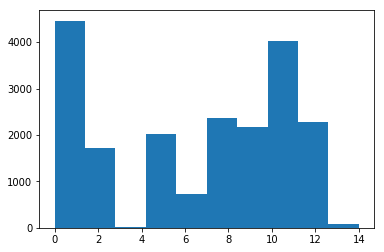

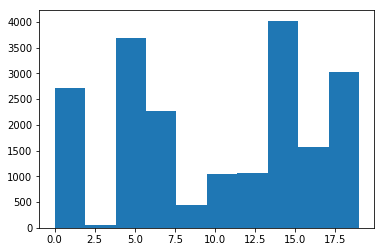

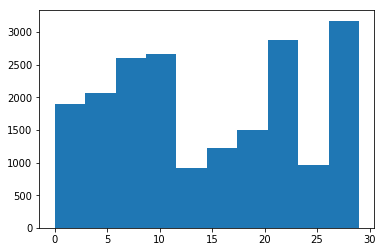

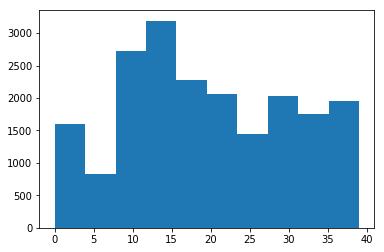

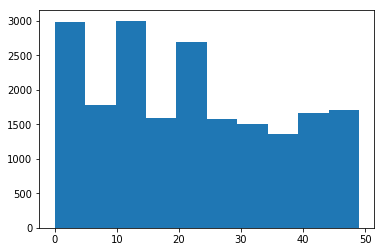

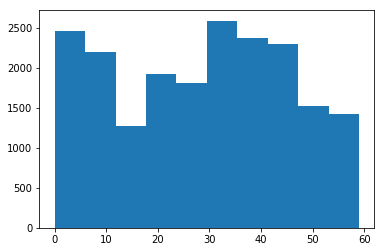

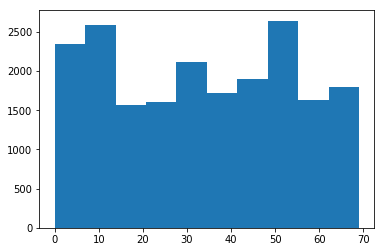

In [351]:
from sklearn.cluster import KMeans

for n_clust in [15, 20, 30, 40, 50, 60, 70]:
    kmeans = KMeans(n_clusters=n_clust, n_jobs=4).fit(encoded_data)
    labels = kmeans.labels_
    
    plt.hist(labels)
    plt.show()

from sklearn.neighbors import KNeighborsClassifier
for n_neigh in [10, 15, 20, 30]:
    knn = KNeighborsClassifier(n_neighbors=n_neigh, n_jobs=4).fit(encoded_data)
    labels = knn.labels_
    
    plt.hist(labels)
    plt.show()

In [420]:
n_clusters = 70

clusterizer = KMeans(n_clusters=n_clusters, n_jobs=4).fit(encoded_data)
uniq_labels = set(clusterizer.labels_)
mol_clusters = []

for i in range(0, len(dataset)):
    mol_id = i+2
    ds = dataset[i]
        
    scaled_ds = s.transform(ds)
    enc_ds    = scaled_ds #enc.predict(scaled_ds)
        
    clusters = clusterizer.predict(enc_ds)
    mol_clusters.append(list(clusters))
        

In [421]:
values_file = "./values"
values_data = []

with open(values_file, "r") as f:
    f.readline()
    for line in f:
        tmp = line.strip(" ,\n").split('\t')
        tmp = [int(tmp[0]), float(tmp[1])]
        values_data.append(tmp)
        
values = dict()
for val in sorted(values_data, key=lambda x: x[0]):
    values[val[0]] = val[1]

In [422]:
x = []
y = []

for i in range(0, len(dataset)):
    mol_id = i+2
    x.append([mol_clusters[i].count(l) for l in uniq_labels])
    y.append(values[mol_id])

In [423]:
sc = StandardScaler()
sc_x = sc.fit_transform(x)

In [424]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [425]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=900, n_jobs=4).fit(x_train, y_train)

In [426]:
print(rfr.score(x_test, y_test))

0.10103562296983759


In [427]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=500).fit(x_train, y_train)

In [428]:
print(gbr.score(x_test, y_test))

-0.028622873891968048


In [391]:
0.23142650945891707

0.23142650945891707

In [392]:
0.2633144533762828

0.2633144533762828

In [341]:
0.20276521111127266

0.20276521111127266

In [ ]:
def gen_dataset(mol, sp):
    prop = getProperties(m, probe_radius=0.20)
    mol_data = np.asarray(list(prop.values()))
    mol_data = np.transpose(mol_data)
    
    dataset = []
    
    for sigma in sp:
        maxs = sp[sigma][1]
        mins = sp[sigma][0]
        sigma = float(sigma)
        radius = sigma*np.sqrt(2)
        
        for v in maxs:
            neighbors = list(filter(lambda u: m.mesh.dist[v][u] <= radius, m.mesh.G.nodes()))
            n_props = np.asarray([mol_data[u] for u in neighbors])
            mean_prop = np.mean(n_props, axis=0)
            var_prop  = np.var(n_props, axis=0)
            max_prop  = np.max(n_props, axis=0)
            min_prop  = np.min(n_props, axis=0)
            meta = np.asarray([radius, 1.0])
            dataset.append(np.concatenate((mean_prop, var_prop, max_prop, min_prop, meta)))
            
        for v in maxs:
            neighbors = list(filter(lambda u: m.mesh.dist[v][u] <= radius, m.mesh.G.nodes()))
            n_props = np.asarray([mol_data[u] for u in neighbors])
            mean_prop = np.mean(n_props, axis=0)
            var_prop  = np.var(n_props, axis=0)
            max_prop  = np.max(n_props, axis=0)
            min_prop  = np.min(n_props, axis=0)
            meta = np.asarray([radius, -1.0])
            dataset.append(np.concatenate((mean_prop, var_prop, max_prop, min_prop, meta)))
            
    return np.asarray(dataset)

In [ ]:
def gen_d2_mol(mol, ds,  sp, clust):
    uniq_labels = sorted(list(set(clust.labels_)))
    clust_dist = dict()
    
    for l1 in range(0, len(uniq_labels)):
        for l2 in range(l1, len(uniq_labels)):
            clust_dist[l1] = dict()
            clust_dist[l2] = []
    
    p_clust = dict()
    pos = 0
    
    for sigma in sp:
        maxs = sp[sigma][1]
        mins = sp[sigma][0]
        
        for v in maxs:
            p_clust[v] = clust.predict(ds[pos])
            pos += 1
        
        for v in mins:
            p_clust[v] = clust.predict(ds[pos])
            pos += 1
            
    vertices = sorted(list(p_clust.keys()))
    
    for v_id in range(0, len(vertices)):
        for u_id in range(i, len(vertices)):
            u = vertices[u_id]
            v = vertices[v_id]
            
            c_u = p_clust[u]
            c_v = p_clust[v]
            
            clust_dist[v][u] = m.mesh.dist[v][u]
            
            
        